# Importing Stuff

In [3]:
!pip install -qq simpletransformers

In [4]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
import logging 

# Preprocessing the Data

In [5]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [6]:
# Reading the data:
train = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/train.csv")
test = pd.read_csv("/content/drive/My Drive/Glue Labs/Abuse Model 16/Data/test.csv")

In [7]:
train.drop(['Unnamed: 0'], axis=1, inplace = True)
test.drop(['Unnamed: 0'], axis=1, inplace = True)

In [9]:
test.shape

(16187, 2)

# Model

In [ ]:
model = ClassificationModel('xlmroberta', 'xlm-roberta-base', 
                            args={'reprocess_input_data': True,
                                  'overwrite_output_dir': True,
                                  'train_batch_size': 64,
                                  'num_train_epochs': 5,'save_steps':False},
                             use_cuda=True)

INFO:filelock:Lock 139921458113392 acquired on /root/.cache/torch/transformers/87683eb92ea383b0475fecf99970e950a03c9ff5e51648d6eee56fb754612465.ab95cf27f9419a99cce4f19d09e655aba382a2bafe2fe26d0cc24c18cf1a1af6.lock


INFO:filelock:Lock 139921458113392 released on /root/.cache/torch/transformers/87683eb92ea383b0475fecf99970e950a03c9ff5e51648d6eee56fb754612465.ab95cf27f9419a99cce4f19d09e655aba382a2bafe2fe26d0cc24c18cf1a1af6.lock
INFO:filelock:Lock 139920253332728 acquired on /root/.cache/torch/transformers/97d0ea09f8074264957d062ec20ccb79af7b917d091add8261b26874daf51b5d.f42212747c1c27fcebaa0a89e2a83c38c6d3d4340f21922f892b88d882146ac2.lock


INFO:filelock:Lock 139920253332728 released on /root/.cache/torch/transformers/97d0ea09f8074264957d062ec20ccb79af7b917d091add8261b26874daf51b5d.f42212747c1c27fcebaa0a89e2a83c38c6d3d4340f21922f892b88d882146ac2.lock


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weig

INFO:filelock:Lock 139920251269416 released on /root/.cache/torch/transformers/9df9ae4442348b73950203b63d1b8ed2d18eba68921872aee0c3a9d05b9673c6.00628a9eeb8baf4080d44a0abe9fe8057893de20c7cb6e6423cddbf452f7d4d8.lock


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:279: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


In [ ]:
# First set:
model.train_model(train, output_dir="/content/drive/My Drive/Glue Labs/Abuse Model 16/Model/")

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


INFO:simpletransformers.classification.classification_model: Training of xlmroberta model complete. Saved to /content/drive/My Drive/Glue Labs/Abuse Model 16/Model/.


(9065, 0.1456899383070278)

In [ ]:
rm -r "/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model"

In [ ]:
# Results from first set of epochs:
result, model_outputs, wrong_predictions = model.eval_model(test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.8754863125843483, 'tp': 9562, 'tn': 13323, 'fp': 627, 'fn': 856, 'eval_loss': 0.2400404779075626}


In [ ]:
!cp -r "/content/a" "/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model"

# Evaluating

In [ ]:
model = ClassificationModel("xlmroberta", "/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/a")

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:279: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.97275663998838, 'tp': 7591, 'tn': 8376, 'fp': 100, 'fn': 120, 'eval_loss': 0.04800189157696029}


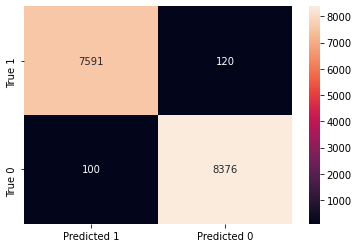

In [ ]:
import seaborn as sns
matrix = [[result['tp'], result['fn']],   [result['fp'], result['tn']]]
matrix = pd.DataFrame(matrix, columns = ['Predicted 1', 'Predicted 0'], index = ['True 1', 'True 0'])

sns.heatmap(matrix, annot=True, fmt = 'g')

In [ ]:
model = ClassificationModel('bert', '/content/drive/MyDrive/Glue Labs/Abuse Model 16/Model/b (M-BERT)/outputs')

In [ ]:
model.predict(['hain behenchod'])

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array([1]), array([[-3.52539062,  3.40039062]]))